<a href="https://colab.research.google.com/github/samtam0714/Chicago-Food-Inspection-Analytics/blob/main/food_inspection_chicago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#load dataset
dataset = pd.read_csv('/content/drive/My Drive/Food_Inspections.csv')
dataset.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2385628,ALL IN 1 DISCOUNT INC,ALL IN 1 DISCOUNT INC,2744661.0,Grocery Store,Risk 3 (Low),5719-5725 W DIVERSEY AVE,CHICAGO,IL,60639.0,08/03/2020,License,Pass w/ Conditions,5. PROCEDURES FOR RESPONDING TO VOMITING AND D...,41.931121,-87.769554,"(-87.76955418373417, 41.9311212237607)"
1,2385591,HELEN'S GROCERY & LIQ,HELEN'S GROCERY & LIQ,8017.0,Grocery Store,Risk 3 (Low),2300 W 21ST ST,CHICAGO,IL,60608.0,07/31/2020,Canvass,Out of Business,NaN,41.854005,-87.683363,"(-87.6833629225202, 41.8540047775837)"
2,2385590,PETE'S FRESH SUPERMARKET,PETE'S FRESH SUPERMARKET,1771242.0,Grocery Store,Risk 1 (High),2526 W CERMAK RD,CHICAGO,IL,60608.0,07/31/2020,Complaint Re-Inspection,Pass,NaN,41.852101,-87.689051,"(-87.68905111060724, 41.85210065324028)"
3,2385587,QUEST FOOD MANAGEMENT SERVICES INC,QUEST FOOD MANAGEMENT SERVICES INC,2744583.0,NaN,Risk 1 (High),3300 N CAMPBELL AVE,CHICAGO,IL,60618.0,07/31/2020,License,Not Ready,NaN,41.941426,-87.690799,"(-87.69079930080058, 41.94142629278533)"
4,2385543,OUTLET KINGDOM,NaN,2054475.0,GENERAL STORE,Risk 3 (Low),3449-3451 S HALSTED ST,CHICAGO,IL,60608.0,07/30/2020,Canvass,Out of Business,NaN,41.831075,-87.645971,"(-87.6459711121892, 41.831074943653626)"


In [ ]:
dataset = dataset.applymap(lambda s:s.lower() if type(s) == str else s)
dataset

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2385628,all in 1 discount inc,all in 1 discount inc,2744661.0,grocery store,risk 3 (low),5719-5725 w diversey ave,chicago,il,60639.0,08/03/2020,license,pass w/ conditions,5. procedures for responding to vomiting and d...,41.931121,-87.769554,"(-87.76955418373417, 41.9311212237607)"
1,2385591,helen's grocery & liq,helen's grocery & liq,8017.0,grocery store,risk 3 (low),2300 w 21st st,chicago,il,60608.0,07/31/2020,canvass,out of business,NaN,41.854005,-87.683363,"(-87.6833629225202, 41.8540047775837)"
2,2385590,pete's fresh supermarket,pete's fresh supermarket,1771242.0,grocery store,risk 1 (high),2526 w cermak rd,chicago,il,60608.0,07/31/2020,complaint re-inspection,pass,NaN,41.852101,-87.689051,"(-87.68905111060724, 41.85210065324028)"
3,2385587,quest food management services inc,quest food management services inc,2744583.0,NaN,risk 1 (high),3300 n campbell ave,chicago,il,60618.0,07/31/2020,license,not ready,NaN,41.941426,-87.690799,"(-87.69079930080058, 41.94142629278533)"
4,2385543,outlet kingdom,NaN,2054475.0,general store,risk 3 (low),3449-3451 s halsted st,chicago,il,60608.0,07/30/2020,canvass,out of business,NaN,41.831075,-87.645971,"(-87.6459711121892, 41.831074943653626)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208920,231211,t tasty house,t tasty house,2017359.0,restaurant,risk 1 (high),2002 s wentworth ave,chicago,il,60616.0,02/10/2010,license re-inspection,pass,NaN,41.855282,-87.631993,"(-87.63199264229414, 41.85528170377401)"
208921,68110,wrigleyville dog,wrigleyville dog,25051.0,restaurant,risk 1 (high),3735 n clark st,chicago,il,60613.0,02/02/2010,canvass,fail,3. potentially hazardous food meets temperatur...,41.949895,-87.658511,"(-87.65851083690285, 41.94989452098964)"
208922,72243,adler school inc,adler school day care,6765.0,daycare (2 - 6 years),risk 1 (high),2237-2239 w lawrence ave,chicago,il,60625.0,01/22/2010,license re-inspection,pass,NaN,41.968554,-87.685483,"(-87.68548253142126, 41.968553831007675)"
208923,134297,best sub no2,best sub no2,1647305.0,restaurant,risk 2 (medium),3426 w diversey ave,chicago,il,60647.0,02/10/2010,canvass,pass,33. food and non-food contact equipment utensi...,41.932069,-87.713294,"(-87.71329441237397, 41.932068626464286)"


# **Data Cleaning**

## **Delete dublicate value**

In [ ]:
dataset.shape

(208925, 17)

In [ ]:
dataset['Location'].duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
208920     True
208921     True
208922     True
208923     True
208924     True
Name: Location, Length: 208925, dtype: bool

In [ ]:
df = dataset.drop_duplicates(subset=['Location'])

In [ ]:
df['Location'].duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
208359    False
208481    False
208510    False
208735    False
208801    False
Name: Location, Length: 17090, dtype: bool

In [ ]:
df['Location'].value_counts()

(-87.69455963392454, 41.86105521128581)     1
(-87.73407785853567, 41.96379703820697)     1
(-87.68773850836422, 41.92319989266042)     1
(-87.5594812461338, 41.704494506277534)     1
(-87.66880777819493, 41.810296318834936)    1
                                           ..
(-87.6662339034892, 41.808698515449116)     1
(-87.75476822451198, 41.90215168923222)     1
(-87.7510919961523, 41.953263831201625)     1
(-87.55959822228947, 41.75923093682706)     1
(-87.72754493145142, 41.946270550939566)    1
Name: Location, Length: 17089, dtype: int64

## **Delete specific value from Result**

In [ ]:
resultcount = df.groupby(['Results']).size().reset_index(name='counts')
resultcount

,Results,counts
0,business not located,25
1,fail,1774
2,no entry,1074
3,not ready,345
4,out of business,4420
5,pass,7182
6,pass w/ conditions,2270


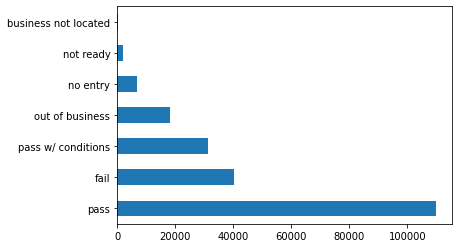

In [ ]:
dataset['Results'].value_counts().head(30).plot(kind='barh')

In [ ]:
df1 = df[(df.Results != 'business not located') & (df.Results != 'no entry') & (df.Results != 'not ready') & (df.Results != 'out of business')]

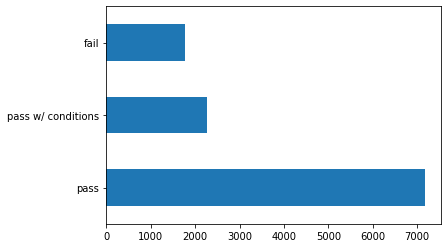

In [ ]:
df1['Results'].value_counts().head(30).plot(kind='barh')

In [ ]:
Results_mapDict={'pass':1, 'fail':2, 'pass w/ conditions':3}
df1['Results']= df1['Results'].map(Results_mapDict)
df1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2385628,all in 1 discount inc,all in 1 discount inc,2744661.0,grocery store,risk 3 (low),5719-5725 w diversey ave,chicago,il,60639.0,08/03/2020,license,3,5. procedures for responding to vomiting and d...,41.931121,-87.769554,"(-87.76955418373417, 41.9311212237607)"
2,2385590,pete's fresh supermarket,pete's fresh supermarket,1771242.0,grocery store,risk 1 (high),2526 w cermak rd,chicago,il,60608.0,07/31/2020,complaint re-inspection,1,NaN,41.852101,-87.689051,"(-87.68905111060724, 41.85210065324028)"
5,2385529,chop suey huang,chop suey huang,2463091.0,restaurant,risk 1 (high),5202 n lincoln ave,chicago,il,60625.0,07/30/2020,canvass re-inspection,3,5. procedures for responding to vomiting and d...,41.975976,-87.692494,"(-87.6924942225335, 41.97597608993619)"
6,2385405,odyssey chicago river,odyssey,2713082.0,restaurant,risk 1 (high),455 n cityfront plaza dr,chicago,il,60611.0,07/27/2020,license,1,NaN,41.890001,-87.621439,"(-87.62143868830125, 41.890001335214684)"
7,2385413,brando's,brando's,2738736.0,restaurant,risk 2 (medium),343 s dearborn st,chicago,il,60604.0,07/28/2020,license,1,NaN,41.877147,-87.629121,"(-87.62912123316899, 41.877146786216336)"


# **Null Value**

In [ ]:
df1.isnull().sum()

Inspection ID         0
DBA Name              0
AKA Name            173
License #             2
Facility Type       130
Risk                 10
Address               0
City                 19
State                 8
Zip                   6
Inspection Date       0
Inspection Type       0
Results               0
Violations         3811
Latitude              1
Longitude             1
Location              1
dtype: int64

In [ ]:
df1

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2385628,all in 1 discount inc,all in 1 discount inc,2744661.0,grocery store,risk 3 (low),5719-5725 w diversey ave,chicago,il,60639.0,08/03/2020,license,3,5. procedures for responding to vomiting and d...,41.931121,-87.769554,"(-87.76955418373417, 41.9311212237607)"
2,2385590,pete's fresh supermarket,pete's fresh supermarket,1771242.0,grocery store,risk 1 (high),2526 w cermak rd,chicago,il,60608.0,07/31/2020,complaint re-inspection,1,NaN,41.852101,-87.689051,"(-87.68905111060724, 41.85210065324028)"
5,2385529,chop suey huang,chop suey huang,2463091.0,restaurant,risk 1 (high),5202 n lincoln ave,chicago,il,60625.0,07/30/2020,canvass re-inspection,3,5. procedures for responding to vomiting and d...,41.975976,-87.692494,"(-87.6924942225335, 41.97597608993619)"
6,2385405,odyssey chicago river,odyssey,2713082.0,restaurant,risk 1 (high),455 n cityfront plaza dr,chicago,il,60611.0,07/27/2020,license,1,NaN,41.890001,-87.621439,"(-87.62143868830125, 41.890001335214684)"
7,2385413,brando's,brando's,2738736.0,restaurant,risk 2 (medium),343 s dearborn st,chicago,il,60604.0,07/28/2020,license,1,NaN,41.877147,-87.629121,"(-87.62912123316899, 41.877146786216336)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208359,227208,morrison authentic southern cooking and pizzeria,morrison authentic southern cooking and pizzeria,77291.0,restaurant,risk 1 (high),8131 s ashland ave,chicago,il,60620.0,02/04/2010,complaint,1,31. clean multi-use utensils and single servic...,41.745778,-87.663176,"(-87.66317552587849, 41.74577825667544)"
208481,74277,kennicott park kids cafe',kennicott park,9999999.0,kids cafe',risk 1 (high),4434 s lake park ave bldg,chicago,il,60653.0,01/22/2010,kids cafe',1,NaN,41.814118,-87.597001,"(-87.59700107819222, 41.81411775782929)"
208510,164255,rainbow grocery,rainbow grocery,61801.0,grocery store,risk 3 (low),2003 w 69th st,chicago,il,60636.0,01/05/2010,canvass re-inspection,1,33. food and non-food contact equipment utensi...,41.768328,-87.673819,"(-87.67381938402684, 41.76832833480071)"
208735,98387,edelweiss,edelweiss,1991203.0,tavern/liquor,risk 3 (low),3808 w belmont ave,chicago,il,60618.0,02/22/2010,license re-inspection,1,NaN,41.939259,-87.722697,"(-87.72269651601053, 41.93925921666965)"


In [ ]:
data=df1.drop(['Violations'], axis=1)
data.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Latitude,Longitude,Location
0,2385628,all in 1 discount inc,all in 1 discount inc,2744661.0,grocery store,risk 3 (low),5719-5725 w diversey ave,chicago,il,60639.0,08/03/2020,license,3,41.931121,-87.769554,"(-87.76955418373417, 41.9311212237607)"
2,2385590,pete's fresh supermarket,pete's fresh supermarket,1771242.0,grocery store,risk 1 (high),2526 w cermak rd,chicago,il,60608.0,07/31/2020,complaint re-inspection,1,41.852101,-87.689051,"(-87.68905111060724, 41.85210065324028)"
5,2385529,chop suey huang,chop suey huang,2463091.0,restaurant,risk 1 (high),5202 n lincoln ave,chicago,il,60625.0,07/30/2020,canvass re-inspection,3,41.975976,-87.692494,"(-87.6924942225335, 41.97597608993619)"
6,2385405,odyssey chicago river,odyssey,2713082.0,restaurant,risk 1 (high),455 n cityfront plaza dr,chicago,il,60611.0,07/27/2020,license,1,41.890001,-87.621439,"(-87.62143868830125, 41.890001335214684)"
7,2385413,brando's,brando's,2738736.0,restaurant,risk 2 (medium),343 s dearborn st,chicago,il,60604.0,07/28/2020,license,1,41.877147,-87.629121,"(-87.62912123316899, 41.877146786216336)"


In [ ]:
data.isnull().sum()

Inspection ID        0
DBA Name             0
AKA Name           173
License #            2
Facility Type      130
Risk                10
Address              0
City                19
State                8
Zip                  6
Inspection Date      0
Inspection Type      0
Results              0
Latitude             1
Longitude            1
Location             1
dtype: int64

# **Misspelled**

In [ ]:
data.replace(to_replace=['cchicago', 'chicagochicago', 'chchicago', 'chicagohicago','chicago.'],
           value= ['chicago','chicago','chicago','chicago','chicago'], 
           inplace=True)
data.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Latitude,Longitude,Location
0,2385628,all in 1 discount inc,all in 1 discount inc,2744661.0,grocery store,risk 3 (low),5719-5725 w diversey ave,chicago,il,60639.0,08/03/2020,license,3,41.931121,-87.769554,"(-87.76955418373417, 41.9311212237607)"
2,2385590,pete's fresh supermarket,pete's fresh supermarket,1771242.0,grocery store,risk 1 (high),2526 w cermak rd,chicago,il,60608.0,07/31/2020,complaint re-inspection,1,41.852101,-87.689051,"(-87.68905111060724, 41.85210065324028)"
5,2385529,chop suey huang,chop suey huang,2463091.0,restaurant,risk 1 (high),5202 n lincoln ave,chicago,il,60625.0,07/30/2020,canvass re-inspection,3,41.975976,-87.692494,"(-87.6924942225335, 41.97597608993619)"
6,2385405,odyssey chicago river,odyssey,2713082.0,restaurant,risk 1 (high),455 n cityfront plaza dr,chicago,il,60611.0,07/27/2020,license,1,41.890001,-87.621439,"(-87.62143868830125, 41.890001335214684)"
7,2385413,brando's,brando's,2738736.0,restaurant,risk 2 (medium),343 s dearborn st,chicago,il,60604.0,07/28/2020,license,1,41.877147,-87.629121,"(-87.62912123316899, 41.877146786216336)"


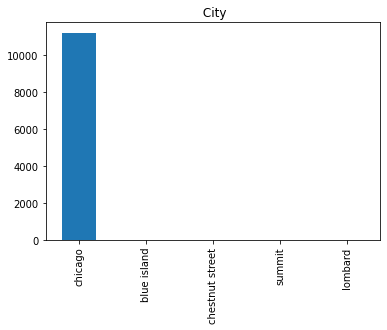

In [ ]:
data.City.value_counts().plot(kind = 'bar', title = ' City')

In [ ]:
data.City.value_counts()

chicago            11203
blue island            1
chestnut street        1
summit                 1
lombard                1
Name: City, dtype: int64

# **Viz**

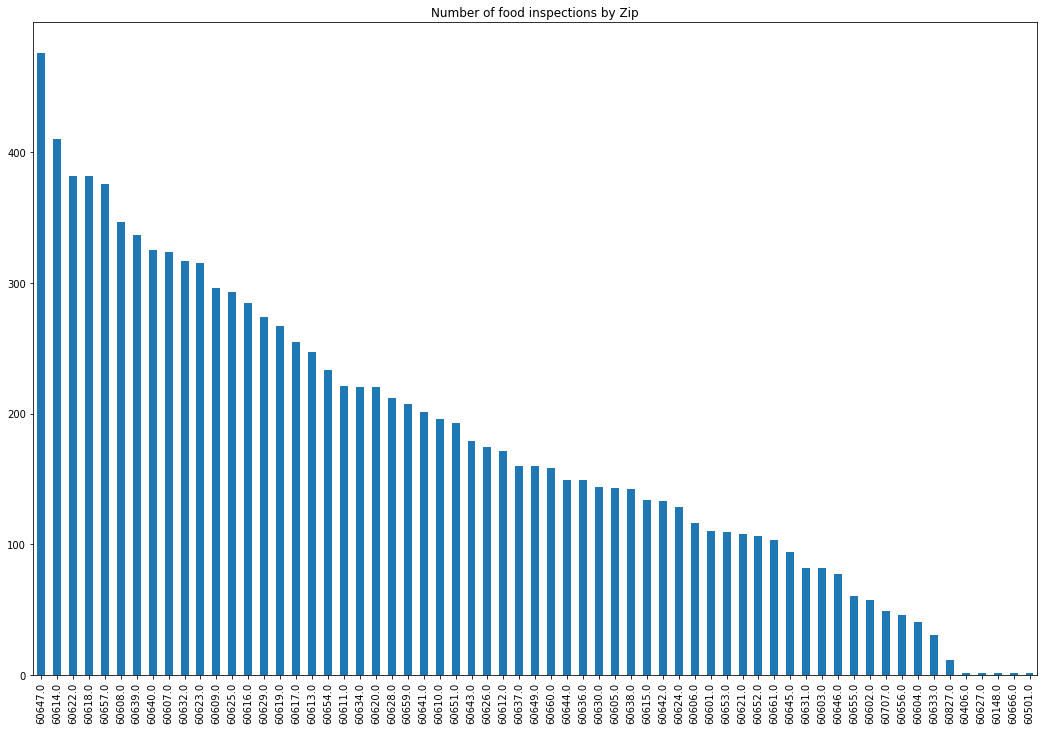

In [ ]:
data.Zip.value_counts().plot(kind = 'bar', title = 'Number of food inspections by Zip', figsize = (18, 12))

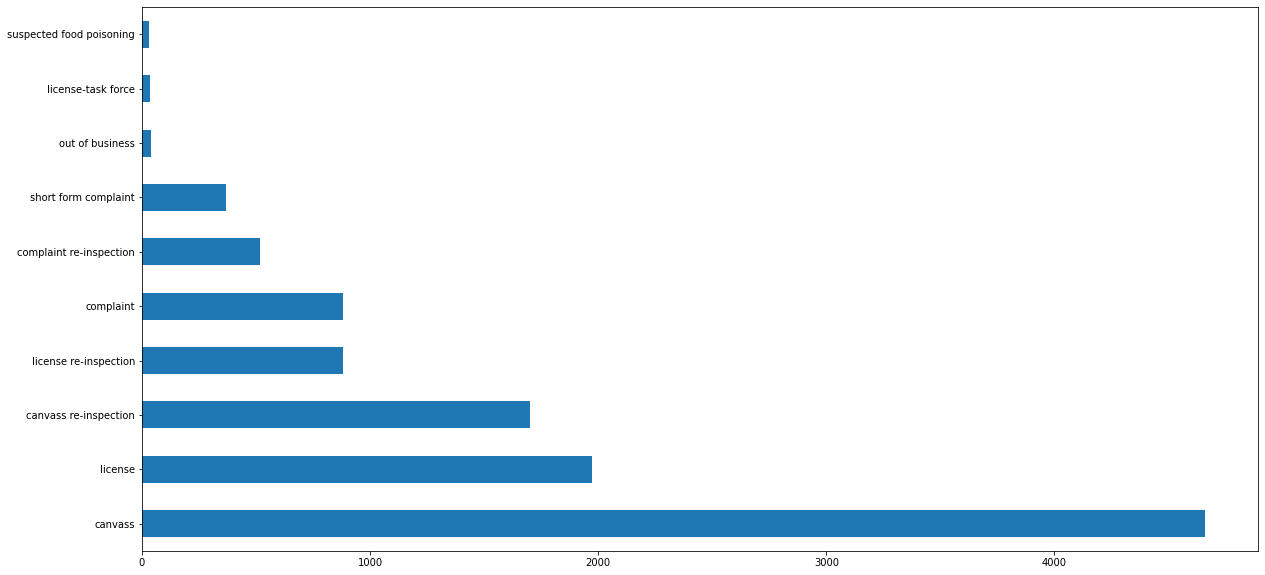

In [ ]:
data['Inspection Type'].value_counts().head(10).plot(kind='barh', figsize=(20,10))

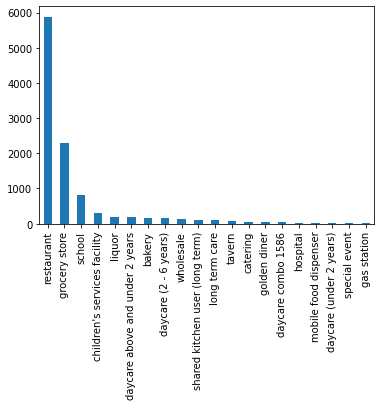

In [ ]:
data['Facility Type'].value_counts()[0:20].plot(kind = 'bar')

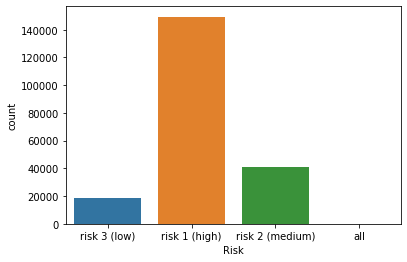

In [ ]:
import seaborn as sns
ax = sns.countplot(x="Risk", data=dataset)

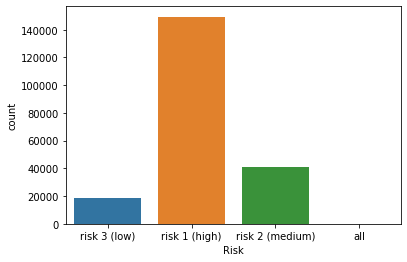

In [ ]:
import seaborn as sns
axx = sns.countplot(x="Risk", data=dataset)

In [ ]:
data['Inspection Date'] = pd.to_datetime(data['Inspection Date'])
data['Inspection Date']

0        2020-08-03
2        2020-07-31
5        2020-07-30
6        2020-07-27
7        2020-07-28
            ...    
208359   2010-02-04
208481   2010-01-22
208510   2010-01-05
208735   2010-02-22
208801   2010-02-17
Name: Inspection Date, Length: 11226, dtype: datetime64[ns]

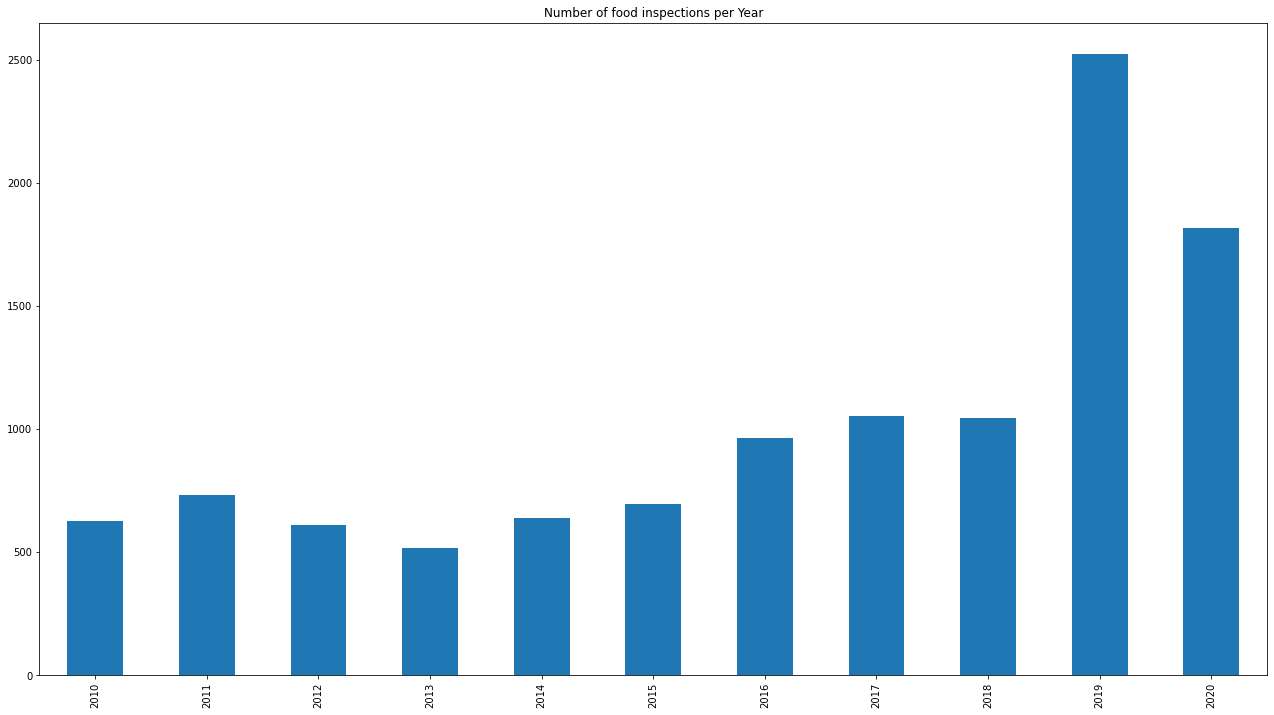

In [ ]:
per_year = data['Inspection Date'].dt.to_period('Y').value_counts()
per_year.sort_index(inplace = True)
per_year.plot(kind = 'bar', figsize = (22, 12), title = "Number of food inspections per Year")

In [ ]:
per_month = data['Inspection Date'].dt.to_period('M').value_counts()
per_month

2020-01    316
2020-04    293
2020-05    278
2019-10    264
2020-03    262
          ... 
2013-11     35
2014-01     34
2012-12     32
2013-02     31
2020-08      2
Freq: M, Name: Inspection Date, Length: 128, dtype: int64

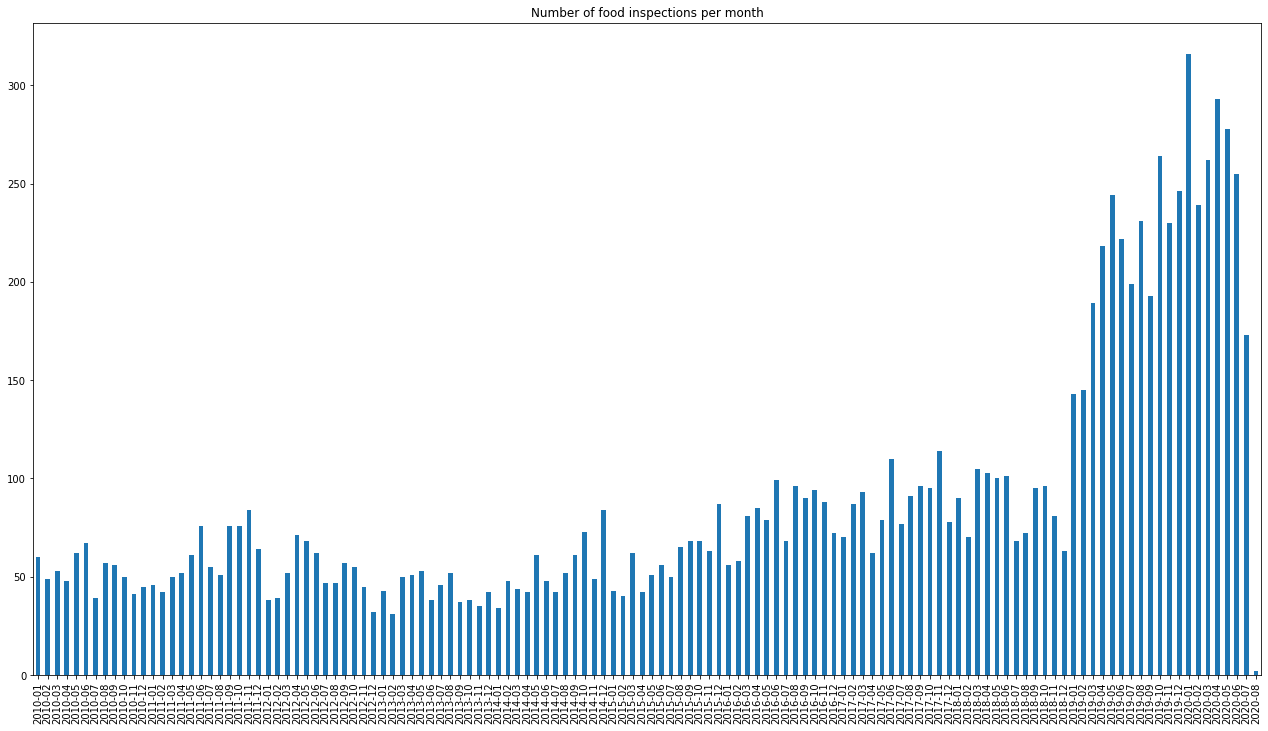

In [ ]:
per_month.sort_index(inplace = True)
per_month.plot(kind = 'bar', figsize = (22, 12), title = "Number of food inspections per month")

# **Geographical Plotting**

In [ ]:
!pip install geopandas

     |████████████████████████████████| 972kB 2.7MB/s 
     |████████████████████████████████| 10.9MB 19.5MB/s 
     |████████████████████████████████| 14.7MB 309kB/s 


In [ ]:
# import libraries
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

In [ ]:
street_map= gpd.read_file('/content/geo_export_630a93aa-b88d-46bd-97c9-3d1c651c2969.shp')

In [ ]:
street_map.head()

,pri_neigh,sec_neigh,shape_area,shape_len,geometry
0,Grand Boulevard,BRONZEVILLE,4.849250e+07,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60670 41.816..."
1,Printers Row,PRINTERS ROW,2.162138e+06,6864.247156,"POLYGON ((-87.62761 41.87437, -87.62760 41.873..."
2,United Center,UNITED CENTER,3.252051e+07,23101.363745,"POLYGON ((-87.66707 41.88885, -87.66707 41.888..."
3,Sheffield & DePaul,SHEFFIELD & DEPAUL,1.048259e+07,13227.049745,"POLYGON ((-87.65833 41.92166, -87.65835 41.922..."
4,Humboldt Park,HUMBOLDT PARK,1.250104e+08,46126.751351,"POLYGON ((-87.74060 41.88782, -87.74060 41.887..."


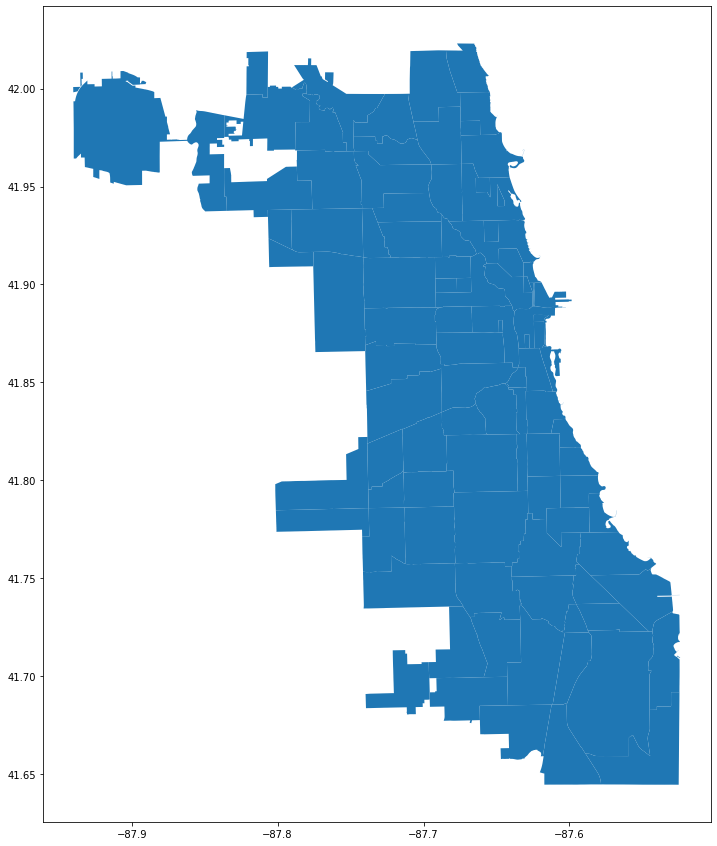

In [ ]:
fig,ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax)

In [ ]:
crs = {'init': 'epsg:4326'}

In [ ]:
data

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Latitude,Longitude,Location
0,2385628,all in 1 discount inc,all in 1 discount inc,2744661.0,grocery store,risk 3 (low),5719-5725 w diversey ave,chicago,il,60639.0,2020-08-03,license,3,41.931121,-87.769554,"(-87.76955418373417, 41.9311212237607)"
2,2385590,pete's fresh supermarket,pete's fresh supermarket,1771242.0,grocery store,risk 1 (high),2526 w cermak rd,chicago,il,60608.0,2020-07-31,complaint re-inspection,1,41.852101,-87.689051,"(-87.68905111060724, 41.85210065324028)"
5,2385529,chop suey huang,chop suey huang,2463091.0,restaurant,risk 1 (high),5202 n lincoln ave,chicago,il,60625.0,2020-07-30,canvass re-inspection,3,41.975976,-87.692494,"(-87.6924942225335, 41.97597608993619)"
6,2385405,odyssey chicago river,odyssey,2713082.0,restaurant,risk 1 (high),455 n cityfront plaza dr,chicago,il,60611.0,2020-07-27,license,1,41.890001,-87.621439,"(-87.62143868830125, 41.890001335214684)"
7,2385413,brando's,brando's,2738736.0,restaurant,risk 2 (medium),343 s dearborn st,chicago,il,60604.0,2020-07-28,license,1,41.877147,-87.629121,"(-87.62912123316899, 41.877146786216336)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208359,227208,morrison authentic southern cooking and pizzeria,morrison authentic southern cooking and pizzeria,77291.0,restaurant,risk 1 (high),8131 s ashland ave,chicago,il,60620.0,2010-02-04,complaint,1,41.745778,-87.663176,"(-87.66317552587849, 41.74577825667544)"
208481,74277,kennicott park kids cafe',kennicott park,9999999.0,kids cafe',risk 1 (high),4434 s lake park ave bldg,chicago,il,60653.0,2010-01-22,kids cafe',1,41.814118,-87.597001,"(-87.59700107819222, 41.81411775782929)"
208510,164255,rainbow grocery,rainbow grocery,61801.0,grocery store,risk 3 (low),2003 w 69th st,chicago,il,60636.0,2010-01-05,canvass re-inspection,1,41.768328,-87.673819,"(-87.67381938402684, 41.76832833480071)"
208735,98387,edelweiss,edelweiss,1991203.0,tavern/liquor,risk 3 (low),3808 w belmont ave,chicago,il,60618.0,2010-02-22,license re-inspection,1,41.939259,-87.722697,"(-87.72269651601053, 41.93925921666965)"


In [ ]:
geometry = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]

In [ ]:
geo_df = gpd.GeoDataFrame(data, crs = crs, geometry = geometry)

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [ ]:
geo_df

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Latitude,Longitude,Location,geometry
0,2385628,all in 1 discount inc,all in 1 discount inc,2744661.0,grocery store,risk 3 (low),5719-5725 w diversey ave,chicago,il,60639.0,2020-08-03,license,3,41.931121,-87.769554,"(-87.76955418373417, 41.9311212237607)",POINT (-87.76955 41.93112)
2,2385590,pete's fresh supermarket,pete's fresh supermarket,1771242.0,grocery store,risk 1 (high),2526 w cermak rd,chicago,il,60608.0,2020-07-31,complaint re-inspection,1,41.852101,-87.689051,"(-87.68905111060724, 41.85210065324028)",POINT (-87.68905 41.85210)
5,2385529,chop suey huang,chop suey huang,2463091.0,restaurant,risk 1 (high),5202 n lincoln ave,chicago,il,60625.0,2020-07-30,canvass re-inspection,3,41.975976,-87.692494,"(-87.6924942225335, 41.97597608993619)",POINT (-87.69249 41.97598)
6,2385405,odyssey chicago river,odyssey,2713082.0,restaurant,risk 1 (high),455 n cityfront plaza dr,chicago,il,60611.0,2020-07-27,license,1,41.890001,-87.621439,"(-87.62143868830125, 41.890001335214684)",POINT (-87.62144 41.89000)
7,2385413,brando's,brando's,2738736.0,restaurant,risk 2 (medium),343 s dearborn st,chicago,il,60604.0,2020-07-28,license,1,41.877147,-87.629121,"(-87.62912123316899, 41.877146786216336)",POINT (-87.62912 41.87715)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208359,227208,morrison authentic southern cooking and pizzeria,morrison authentic southern cooking and pizzeria,77291.0,restaurant,risk 1 (high),8131 s ashland ave,chicago,il,60620.0,2010-02-04,complaint,1,41.745778,-87.663176,"(-87.66317552587849, 41.74577825667544)",POINT (-87.66318 41.74578)
208481,74277,kennicott park kids cafe',kennicott park,9999999.0,kids cafe',risk 1 (high),4434 s lake park ave bldg,chicago,il,60653.0,2010-01-22,kids cafe',1,41.814118,-87.597001,"(-87.59700107819222, 41.81411775782929)",POINT (-87.59700 41.81412)
208510,164255,rainbow grocery,rainbow grocery,61801.0,grocery store,risk 3 (low),2003 w 69th st,chicago,il,60636.0,2010-01-05,canvass re-inspection,1,41.768328,-87.673819,"(-87.67381938402684, 41.76832833480071)",POINT (-87.67382 41.76833)
208735,98387,edelweiss,edelweiss,1991203.0,tavern/liquor,risk 3 (low),3808 w belmont ave,chicago,il,60618.0,2010-02-22,license re-inspection,1,41.939259,-87.722697,"(-87.72269651601053, 41.93925921666965)",POINT (-87.72270 41.93926)


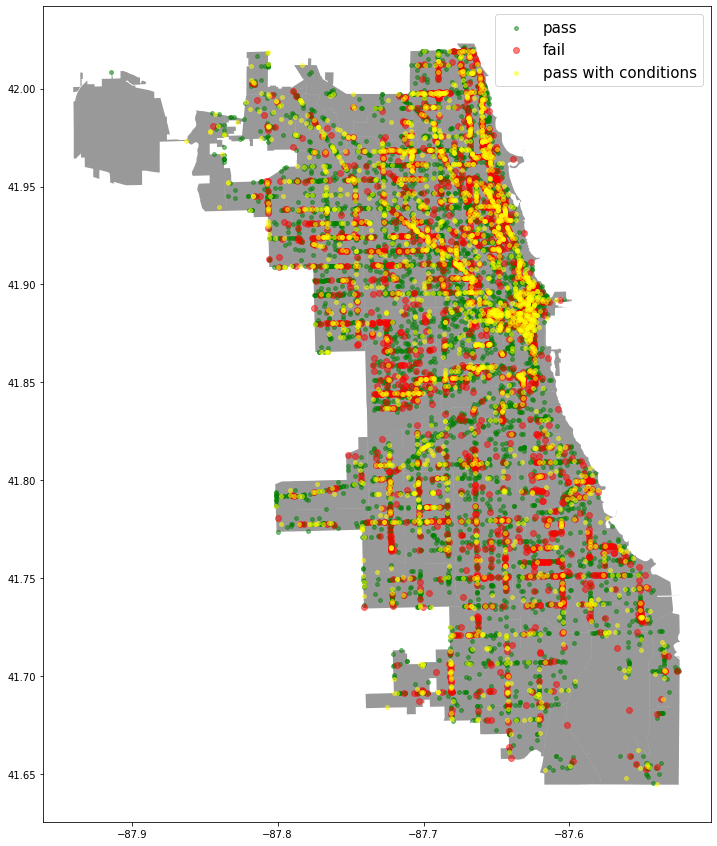

In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(color='black', ax=ax, alpha = 0.4)
geo_df[geo_df['Results']== 1].geometry.plot(marker='o', color = 'green', ax = ax, label = 'pass', alpha=.5, markersize = 15)
geo_df[geo_df['Results']== 2].geometry.plot(marker='o', color = 'red', ax = ax, label = 'fail', alpha = .5, markersize = 35)
geo_df[geo_df['Results']== 3].geometry.plot(marker='o', color = 'yellow', ax = ax, label = 'pass with conditions', alpha = .5, markersize = 15)
plt.legend(prop={'size':15})

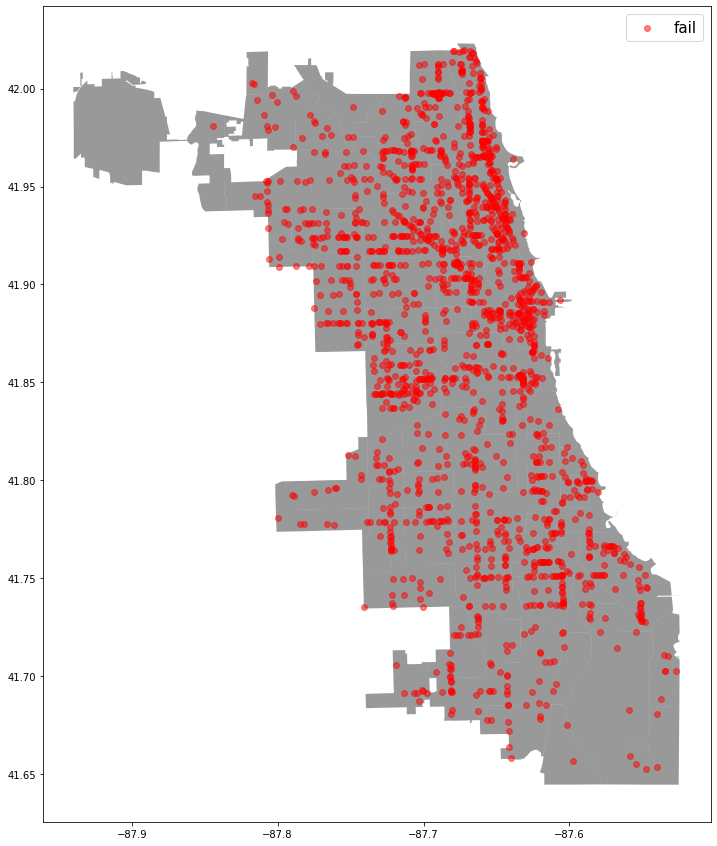

In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(color='black', ax=ax, alpha = 0.4)
geo_df[geo_df['Results']== 2].geometry.plot(marker='o', color = 'red', ax = ax, label = 'fail', alpha = .5, markersize = 35)
plt.legend(prop={'size':15})

# **Facility_Type	VS Risk**

In [ ]:
inspections_count = data.groupby(['Facility Type', 'Risk']).size().reset_index(name='counts')
inspections_count

,Facility Type,Risk,counts
0,(gas station),risk 3 (low),1
1,1023 childern's service facility,risk 1 (high),1
2,1023 childern's services facility,risk 1 (high),2
3,1023-children's services facility,risk 1 (high),2
4,1475 liquor,risk 3 (low),1
...,...,...,...
270,wholesale,risk 3 (low),80
271,wholesale & retail,risk 3 (low),1
272,wholesale bakery,risk 1 (high),1
273,wine store,risk 3 (low),3


In [ ]:
highrisk = data[data['Risk'] == 'risk 1 (high)']['Facility Type'].value_counts()

risk1 = highrisk.to_frame().sort_values(by=['Facility Type'], ascending=False)

risk1.head(10)

,Facility Type
restaurant,4311
school,732
grocery store,357
children's services facility,314
daycare above and under 2 years,179
daycare (2 - 6 years),160
long term care,102
bakery,61
shared kitchen user (long term),56
catering,54


In [ ]:
sorttype = inspections_count.sort_values(['counts'],ascending=False)
sorttype

,Facility Type,Risk,counts
208,restaurant,risk 1 (high),4311
119,grocery store,risk 3 (low),1426
209,restaurant,risk 2 (medium),1394
224,school,risk 1 (high),732
118,grocery store,risk 2 (medium),508
...,...,...,...
120,grocery store / gas station,risk 3 (low),1
121,grocery store /pharmacy,risk 3 (low),1
122,grocery store/cooking school,risk 1 (high),1
125,grocery(gas station),risk 3 (low),1


In [ ]:
plotsort = sorttype[sorttype['Risk'] == 'risk 1 (high)']
plotFtype = plotsort.head(10)

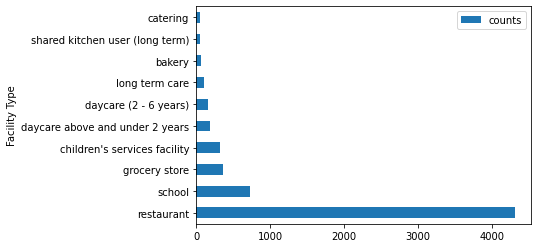

In [ ]:
ax1 = plotFtype.plot.barh(x='Facility Type', y='counts')

# **AKA NAME**

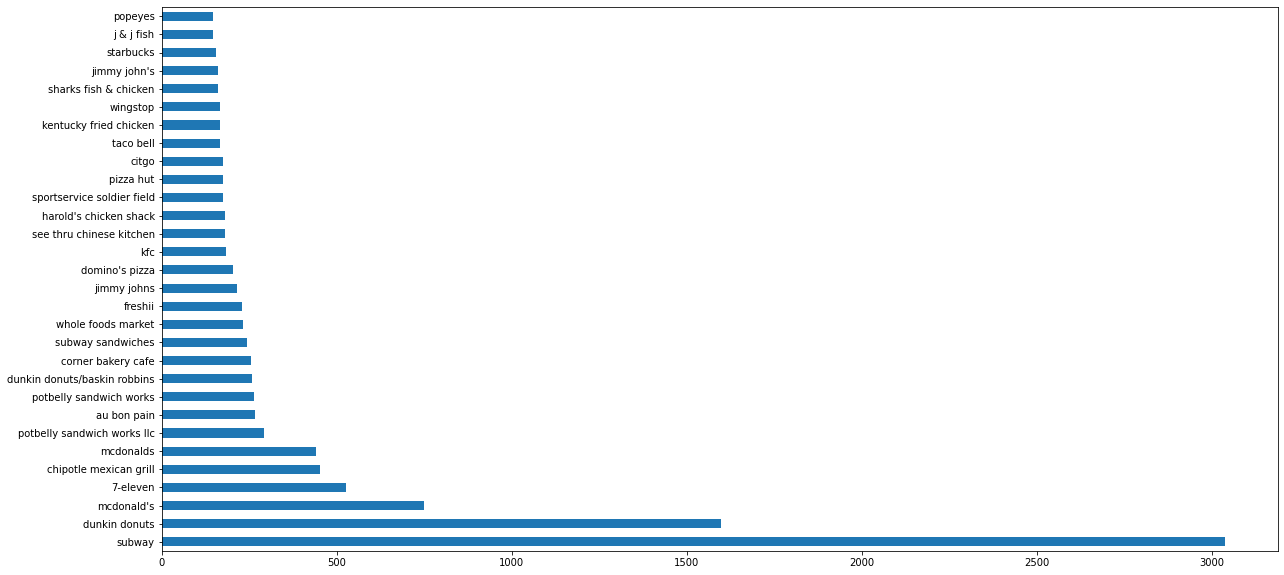

In [ ]:
dataset['DBA Name'].value_counts().head(30).plot(kind='barh', figsize=(20,10))

In [ ]:
# Create a set of all the fails in each zip code counted up
fail = dataset[dataset['Results'] == 'fail']['DBA Name'].value_counts()
fail

subway                            391
dunkin donuts                     240
mcdonald's                        150
mcdonalds                          77
7-eleven                           74
                                 ... 
care-a-lot e.l.c. ii                1
home of life comm. dev. daycar      1
happy mart                          1
joe's pizza inc                     1
la cabana grill                     1
Name: DBA Name, Length: 16084, dtype: int64

In [ ]:
dff = pd.DataFrame(data=fail)
dff

,DBA Name
subway,391
dunkin donuts,240
mcdonald's,150
mcdonalds,77
7-eleven,74
...,...
care-a-lot e.l.c. ii,1
home of life comm. dev. daycar,1
happy mart,1
joe's pizza inc,1


## **Fail vs type**

In [ ]:
# Create a set of all the fails in each zip code counted up
fail = dataset[dataset['Results'] == 'fail']['Facility Type'].value_counts()

# Sort this failure zip code dataset by the number of failures
fail_Facil = fail.to_frame().sort_values(by=['Facility Type'], ascending=False)
fail_Facil.columns = ['Number of Failures']

# Print it out
fail_Facil.head(10)

,Number of Failures
restaurant,25846
grocery store,6434
school,2579
bakery,658
children's services facility,596
daycare (2 - 6 years),530
daycare above and under 2 years,447
liquor,323
long term care,316
mobile food dispenser,256


# **zip**

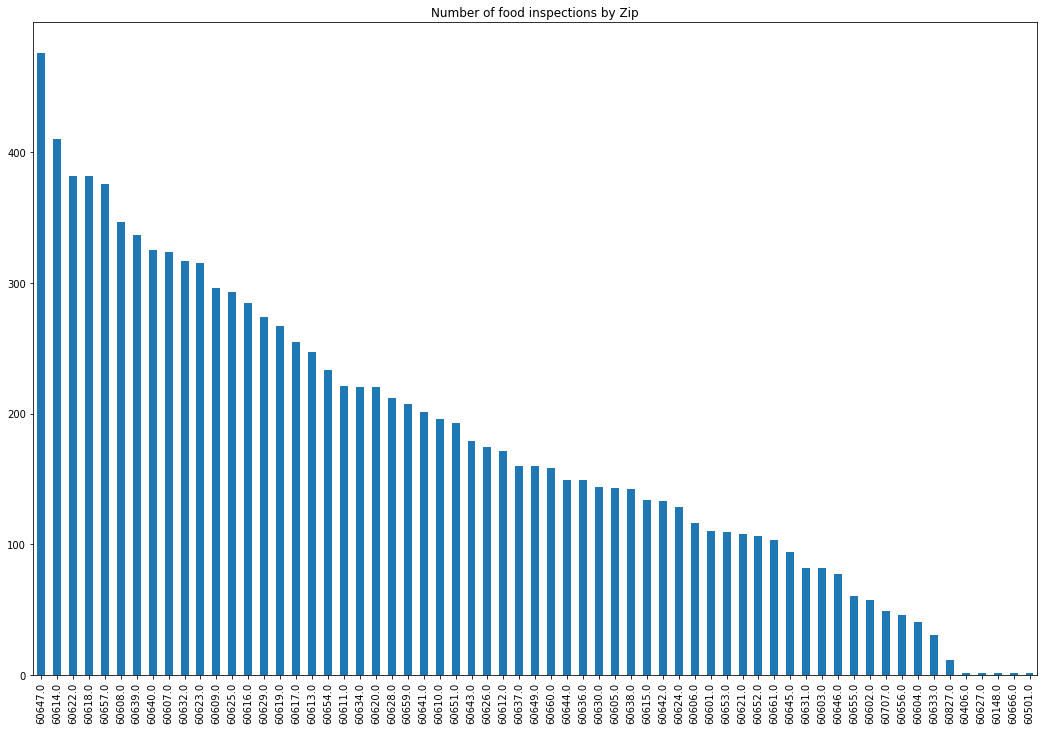

In [ ]:
data.Zip.value_counts().plot(kind = 'bar', title = 'Number of food inspections by Zip', figsize = (18, 12))

In [ ]:
# Create a set of all the fails in each zip code counted up
fail = dataset[dataset['Results'] == 'fail']['Zip'].value_counts()
fail1= pd.DataFrame(fail)
fail1.head(10)

,Zip
60647.0,1560
60614.0,1533
60657.0,1356
60622.0,1297
60608.0,1248
60640.0,1238
60623.0,1235
60639.0,1219
60625.0,1123
60607.0,1089


In [ ]:
# Create a set of all the fails in each zip code counted up
passes = dataset[dataset['Results'] == 'pass']['Zip'].value_counts()
passes

60611.0    3839
60647.0    3694
60614.0    3627
60657.0    3548
60618.0    3440
           ... 
60458.0       1
60464.0       1
60477.0       1
60478.0       1
60202.0       1
Name: Zip, Length: 102, dtype: int64

In [ ]:
fail.columns = ['Number of Failures']
fail.head(10)

60647.0    1560
60614.0    1533
60657.0    1356
60622.0    1297
60608.0    1248
60640.0    1238
60623.0    1235
60639.0    1219
60625.0    1123
60607.0    1089
Name: Zip, dtype: int64

## **corr**

# New Section

In [ ]:
data.corr()

,Inspection ID,License #,Zip,Results,Latitude,Longitude
Inspection ID,1.000000,0.196017,0.011228,0.256401,0.065768,0.010602
License #,0.196017,1.000000,-0.011582,0.022910,0.012147,0.029870
Zip,0.011228,-0.011582,1.000000,0.022724,0.126100,-0.278273
Results,0.256401,0.022910,0.022724,1.000000,0.037725,-0.025218
Latitude,0.065768,0.012147,0.126100,0.037725,1.000000,-0.409300
Longitude,0.010602,0.029870,-0.278273,-0.025218,-0.409300,1.000000


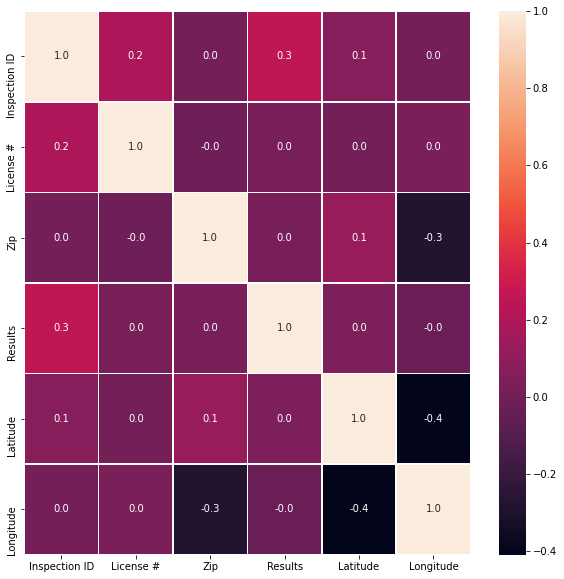

In [ ]:
f, ax  = plt.subplots(figsize = (10, 10))
sns.heatmap(data.corr(), annot=True, linewidths = .5, fmt= '.1f', ax=ax)
plt.show()

In [ ]:
inspections_time = dataset[['Inspection Date', 'Inspection Type', 'Results']]
inspections_time

,Inspection Date,Inspection Type,Results
0,08/03/2020,license,pass w/ conditions
1,07/31/2020,canvass,out of business
2,07/31/2020,complaint re-inspection,pass
3,07/31/2020,license,not ready
4,07/30/2020,canvass,out of business
...,...,...,...
208920,02/10/2010,license re-inspection,pass
208921,02/02/2010,canvass,fail
208922,01/22/2010,license re-inspection,pass
208923,02/10/2010,canvass,pass


In [ ]:
inspections_time_count = inspections_time.groupby(['Inspection Type', 'Results']).size().reset_index(name='counts')
inspections_time_count

,Inspection Type,Results,counts
0,1315 license reinspection,fail,1
1,addendum,pass,1
2,business not located,fail,1
3,canvas,pass,1
4,canvass,business not located,37
...,...,...,...
188,task force(1470) liquor tavern,fail,1
189,taskforce,fail,1
190,taste of chicago,pass,1
191,tavern 1470,fail,1


In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
data.to_csv('data2.csv')
!cp data.csv "drive/My Drive/"